In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import Lasso,LinearRegression,LogisticRegression,ElasticNet
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier,BaseDecisionTree,ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier,StackingClassifier,RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

le = LabelEncoder()
ohe = OneHotEncoder()
sc = StandardScaler()

rfc =  RandomForestClassifier(n_estimators=100)
gnb = GaussianNB()
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier()
extratree = ExtraTreeClassifier()
knnc = KNeighborsClassifier()
svrc = svm.SVR()
lasso = Lasso()

In [2]:
df = pd.read_excel('Data_Train.xlsx')
dft = pd.read_excel('Data_Test.xlsx')
df

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3
...,...,...
7623,"Karnataka has been a Congress bastion, but it ...",0
7624,"The film, which also features Janhvi Kapoor, w...",2
7625,The database has been created after bringing t...,1
7626,"The state, which has had an uneasy relationshi...",0


In [3]:
dft

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...
...,...
2743,"According to researchers, fraud in the mobile ..."
2744,The iPhone XS and XS Max share the Apple A12 c...
2745,"On the photography front, the Note 5 Pro featu..."
2746,UDAY mandated that discoms bring the gap betwe...


In [4]:
df.isna().sum()

STORY      0
SECTION    0
dtype: int64

In [5]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STORY   2748 non-null   object
dtypes: object(1)
memory usage: 21.6+ KB


In [6]:
df.nunique()

STORY      7548
SECTION       4
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)
#df_train.drop_duplicates(inplace=True)

In [8]:
df

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3
...,...,...
7623,"Karnataka has been a Congress bastion, but it ...",0
7624,"The film, which also features Janhvi Kapoor, w...",2
7625,The database has been created after bringing t...,1
7626,"The state, which has had an uneasy relationshi...",0


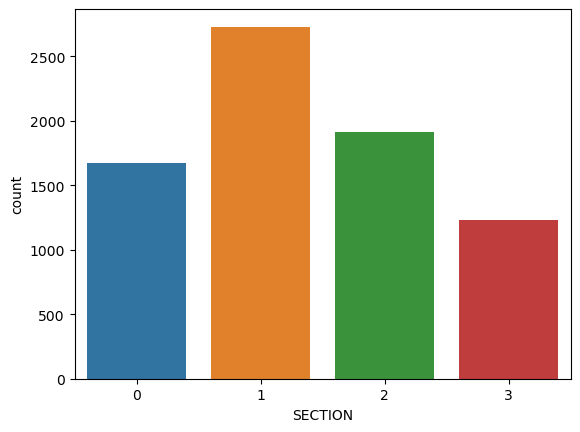

In [9]:
sns.countplot('SECTION', data=df)

## 0: Politics  1 :Technology  2 : Entertainment  3: Business

In [10]:
y = df['SECTION']
x = df['STORY']

In [11]:
x

0       But the most painful was the huge reversal in ...
1       How formidable is the opposition alliance amon...
2       Most Asian currencies were trading lower today...
3       If you want to answer any question, click on ‘...
4       In global markets, gold prices edged up today ...
                              ...                        
7623    Karnataka has been a Congress bastion, but it ...
7624    The film, which also features Janhvi Kapoor, w...
7625    The database has been created after bringing t...
7626    The state, which has had an uneasy relationshi...
7627    Virus stars Kunchacko Boban, Tovino Thomas, In...
Name: STORY, Length: 7551, dtype: object

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=20000)
xx = cv.fit_transform(x)

In [13]:
yy = cv.fit_transform(dft['STORY'])

In [14]:
print(xx.shape)
print(yy.shape)

(7551, 20000)
(2748, 20000)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(xx, y, test_size=0.2)
x_train.shape

(6040, 20000)

In [16]:
y_test[:10]

4183    0
6475    1
1848    3
5818    0
323     3
7141    3
4485    2
2235    1
6610    1
6021    1
Name: SECTION, dtype: int64

### MultinomialNB(alpha=0.1)

In [17]:
algo = MultinomialNB(alpha=0.1)
algo.fit(x_train,y_train)
print(algo.score(x_test,y_test))
algo.predict(x_test[:10])

0.9761747187293184


array([0, 1, 3, 0, 3, 3, 2, 3, 1, 1], dtype=int64)

In [18]:
algo.fit(xx,y)
print(algo.score(x_test,y_test))
algo.predict(x_test[:10])

0.986763732627399


array([0, 1, 3, 0, 3, 3, 2, 1, 1, 1], dtype=int64)

In [34]:
pre = {'SECTION': algo.predict(test)}
tst = pd.DataFrame(pre)
# tst.to_csv('submmision_multinb.csv',index=False)

In [19]:
algo = rfc
algo.fit(x_train,y_train)
print(algo.score(x_test,y_test))
algo.predict(x_test[:10])

0.9344804765056254


array([0, 1, 3, 0, 3, 3, 2, 1, 1, 1], dtype=int64)

In [20]:
algo = gnb
algo.fit(x_train.toarray(),y_train)
temp = x_test.toarray()
print(algo.score(temp,y_test))
algo.predict(temp[:10])

0.9430840502978161


array([0, 1, 3, 0, 3, 1, 2, 1, 1, 1], dtype=int64)

In [21]:
from sklearn.linear_model import SGDClassifier,RidgeClassifier

In [22]:
algo = RidgeClassifier()
algo.fit(x_train,y_train)
print(algo.score(x_test,y_test))
algo.predict(x_test[:10])

0.8755790866975512


array([0, 2, 3, 0, 3, 3, 1, 3, 2, 1], dtype=int64)

In [23]:
algo = SGDClassifier()
algo.fit(xx,y)
print(algo.score(x_test,y_test))
algo.predict(x_test[:10])



0.99867637326274


array([0, 1, 3, 0, 3, 3, 2, 1, 1, 1], dtype=int64)

In [24]:
algo = LogisticRegression()
algo.fit(xx,y)
print(algo.score(x_test,y_test))
algo.predict(x_test[:10])



1.0


array([0, 1, 3, 0, 3, 3, 2, 1, 1, 1], dtype=int64)

In [25]:
# BaggingClassifier,StackingClassifier,RandomForestClassifier,VotingClassifier

clf1 = MultinomialNB(alpha=0.1)
clf2 = RandomForestClassifier(n_estimators=100)
clf3 = SGDClassifier()
clf4 = LogisticRegression()

vote = VotingClassifier(estimators=[('mnb', clf1), ('rfc', clf2), ('sgdc', clf3), ('log', clf4)], voting='hard')

vote.fit(xx,y)
print(vote.score(x_test,y_test))
vote.predict(x_test[:10])

# voting='hard'
# with logisticReg
# 0.9609530112508272
# array([1, 2, 0, 1, 1, 2, 0, 1, 1, 3], dtype=int64)

# current: 
# 0.9669093315684977
# array([1, 2, 0, 1, 1, 2, 0, 1, 1, 3], dtype=int64)

1.0


array([0, 1, 3, 0, 3, 3, 2, 1, 1, 1], dtype=int64)

In [26]:
cv = CountVectorizer(max_features=20000)
test = cv.fit_transform(dft['STORY'])
print(test.shape)

(2748, 20000)


In [32]:
pre_vote = {'SECTION': vote.predict(test)}
tst = pd.DataFrame(pre_vote)
# tst.to_csv('submmision_vote.csv',index=False)

In [27]:

estimators = [('mnb',MultinomialNB(alpha=0.1)),('rfc',RandomForestClassifier(n_estimators=100)),
              ('sgdc',SGDClassifier()),('logir',LogisticRegression()) ]

stack = StackingClassifier(estimators=estimators, final_estimator=SGDClassifier())

stack.fit(xx, y)
print(stack.score(x_test,y_test))
stack.predict(x_test[:10])

# 0.9682329583057577
# array([1, 2, 1, 2, 2, 2, 1, 2, 1, 2], dtype=int64)

# 0.9768365320979484
# array([3, 1, 2, 2, 1, 3, 3, 2, 1, 1], dtype=int64)

0.9966909331568498


array([0, 1, 3, 0, 3, 3, 2, 1, 1, 1], dtype=int64)

In [30]:
pre = {'SECTION': stack.predict(test)}
tst = pd.DataFrame(pre)
#tst.to_csv('submmision_vote.csv',index=False)